# 尤度を二項分布にした場合のパラメータ推定

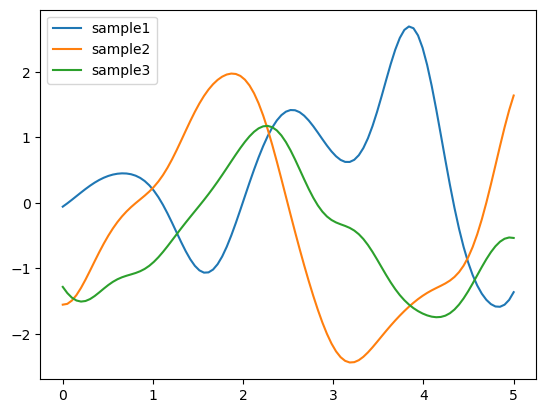

In [33]:
# ガウス過程からのサンプリング
from Gaussian_method import *
import numpy as np
import matplotlib.pyplot as plt

theta = [1.0,2.5]

# 入力
x = np.linspace(0,5,100)

np.random.seed(123)
samples = sample_gp(x,theta ,3)

# ガウス過程のサンプルをプロット
plt.plot(x,samples[0],label="sample1")
plt.plot(x,samples[1],label="sample2")
plt.plot(x,samples[2],label="sample3")
plt.legend()
plt.show()

In [34]:
# シグモイド関数で変換
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

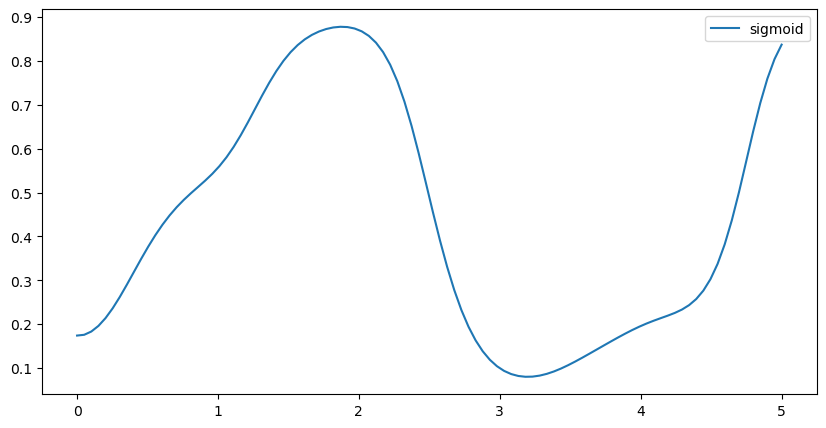

In [35]:
p0 = sigmoid(samples[0])
p1 = sigmoid(samples[1])
p2 = sigmoid(samples[2])
# シグモイド変換後のプロット
plt.figure(figsize=(10, 5))
plt.plot(x, p1, label='sigmoid')
plt.legend()
plt.show()

上の関数が各説明変数に対する二項分布のパラメータ$p(x)$に対応する．

つまり，二項分布の確率密度関数は
$$
p(k|n,p) = {}_n C_k p^k (1-p)^{n-k}
$$

であり，$p(x)$は
$$
p(x) = \frac{1}{1 + \exp(-x)}
$$

であるから，$p(x)$を二項分布のパラメータ$p$に代入すると
$$
p(k|n,x) = {}_n C_k \left(\frac{1}{1 + \exp(-x)}\right)^k \left(1-\frac{1}{1 + \exp(-x)}\right)^{n-k}
$$

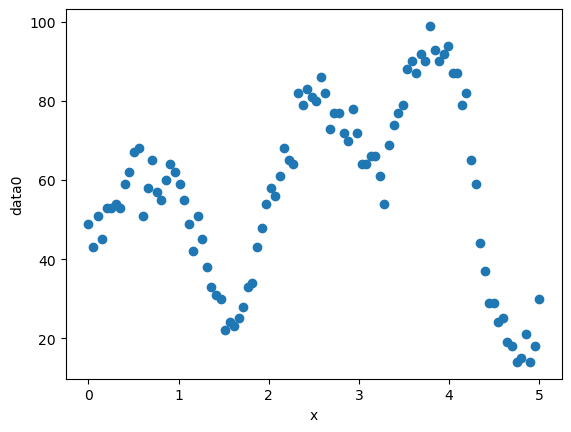

In [36]:
# 二項分布からのサンプリング
N = 100
np.random.seed(123)
m = len(x)
data0 = np.zeros(m)

for i in range(m):
    data0[i] = np.random.binomial(N, p0[i])

plt.plot(x, data0, 'o')
plt.xlabel('x')
plt.ylabel('data0')
plt.show()

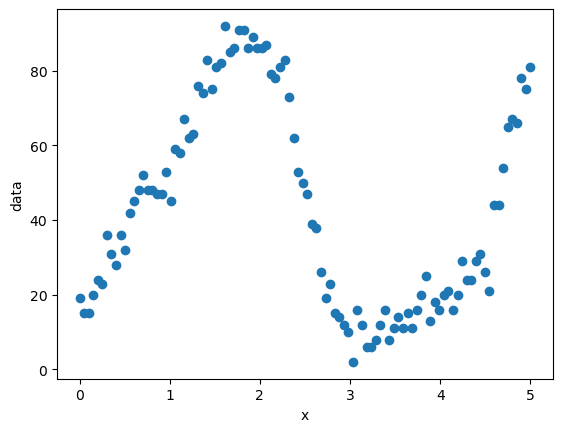

In [37]:
# 二項分布からのサンプリング
N = 100
np.random.seed(123)
m = len(x)
data1 = np.zeros(m)

for i in range(m):
    data1[i] = np.random.binomial(N, p1[i])

plt.plot(x, data1, 'o')
plt.xlabel('x')
plt.ylabel('data')
plt.show()

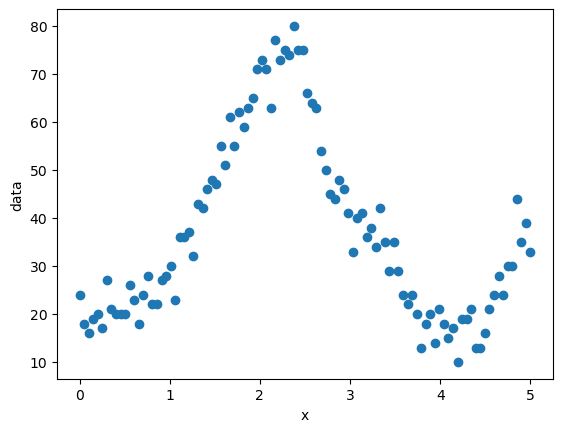

In [38]:
# 二項分布からのサンプリング
N = 100
np.random.seed(123)
m = len(x)
data2 = np.zeros(m)

for i in range(m):
    data2[i] = np.random.binomial(N, p2[i])

plt.plot(x, data2, 'o')
plt.xlabel('x')
plt.ylabel('data')
plt.show()

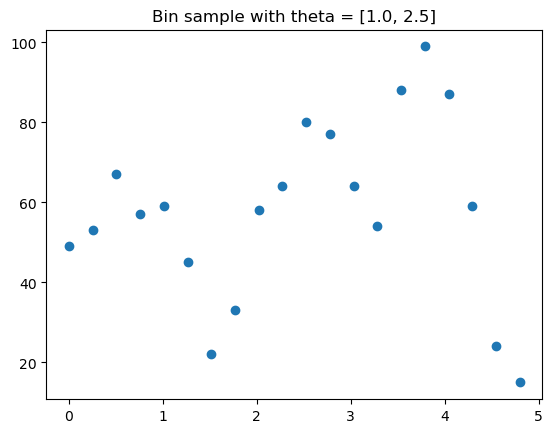

In [39]:
X_train0 = x[::5]
y_train0 = data0[::5]
plt.scatter(X_train0, y_train0)
plt.title(f'Bin sample with theta = {theta}')
plt.show()

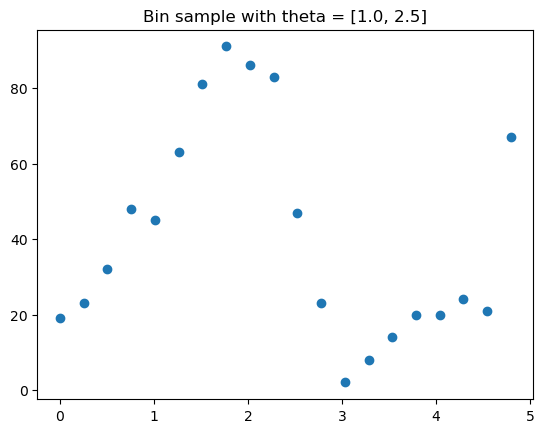

In [40]:
X_train1 = x[::5]
y_train1 = data1[::5]
plt.scatter(X_train1, y_train1)
plt.title(f'Bin sample with theta = {theta}')
plt.show()

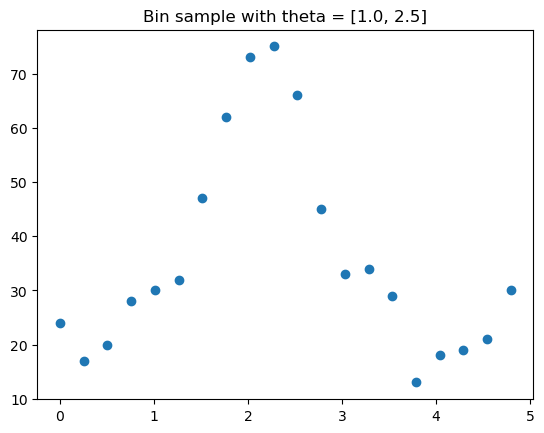

In [41]:
X_train2 = x[::5]
y_train2= data2[::5]
plt.scatter(X_train2, y_train2)
plt.title(f'Bin sample with theta = {theta}')
plt.show()

このデータに対してポアソン尤度のガウス過程回帰を行う．

In [42]:
import GPy

def gpr_poisson(X , Y):
    N = len(Y)
    model = GPy.core.GP(X.reshape(N, 1), Y.reshape(N, 1), kernel=GPy.kern.RBF(1)
                        , likelihood=GPy.likelihoods.Poisson()
                        , inference_method=GPy.inference.latent_function_inference.Laplace())
    model.optimize() # ハイパーパラメータの最適化
    mu , var = model._raw_predict(X.reshape(N, 1))
    return mu , var

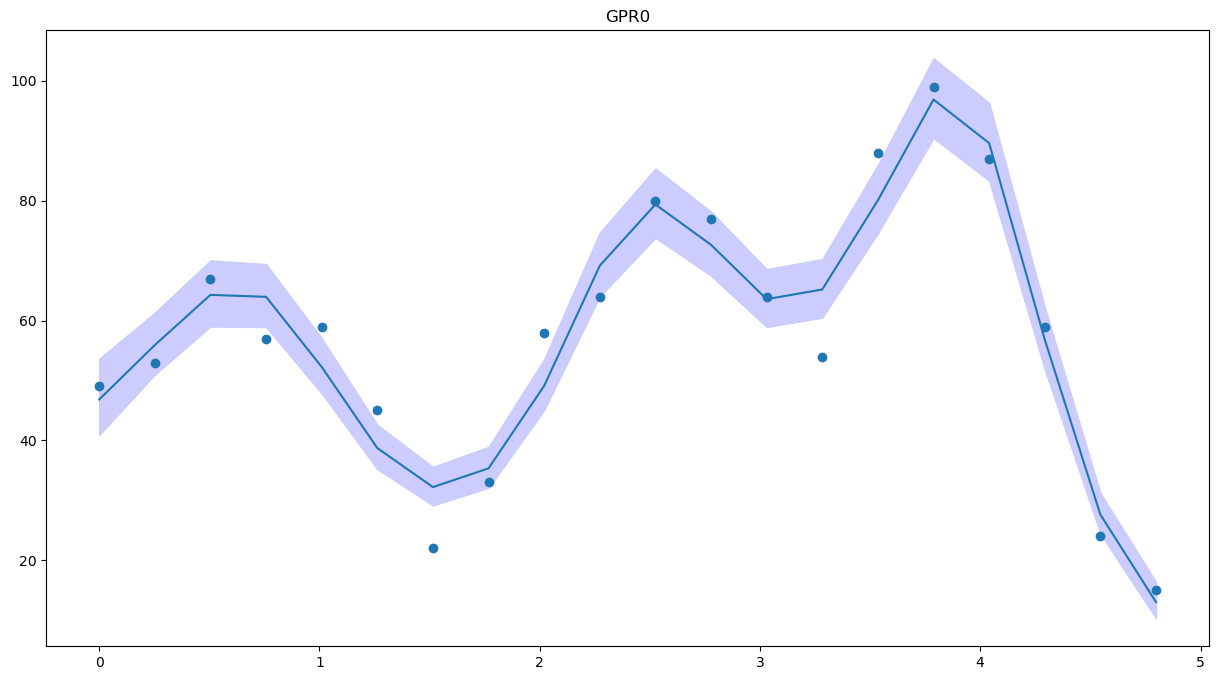

In [43]:
mu , var = gpr_poisson(X_train0 , y_train0)
mu = np.ravel(mu)    # Convert 2D array to 1D
var = np.ravel(var)  # Convert 2D array to 1D

plt.figure(figsize=(15,8))
plt.plot(X_train0, np.exp(mu))
plt.fill_between(X_train0, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(X_train0, y_train0)
plt.title(f'GPR0')
plt.show()

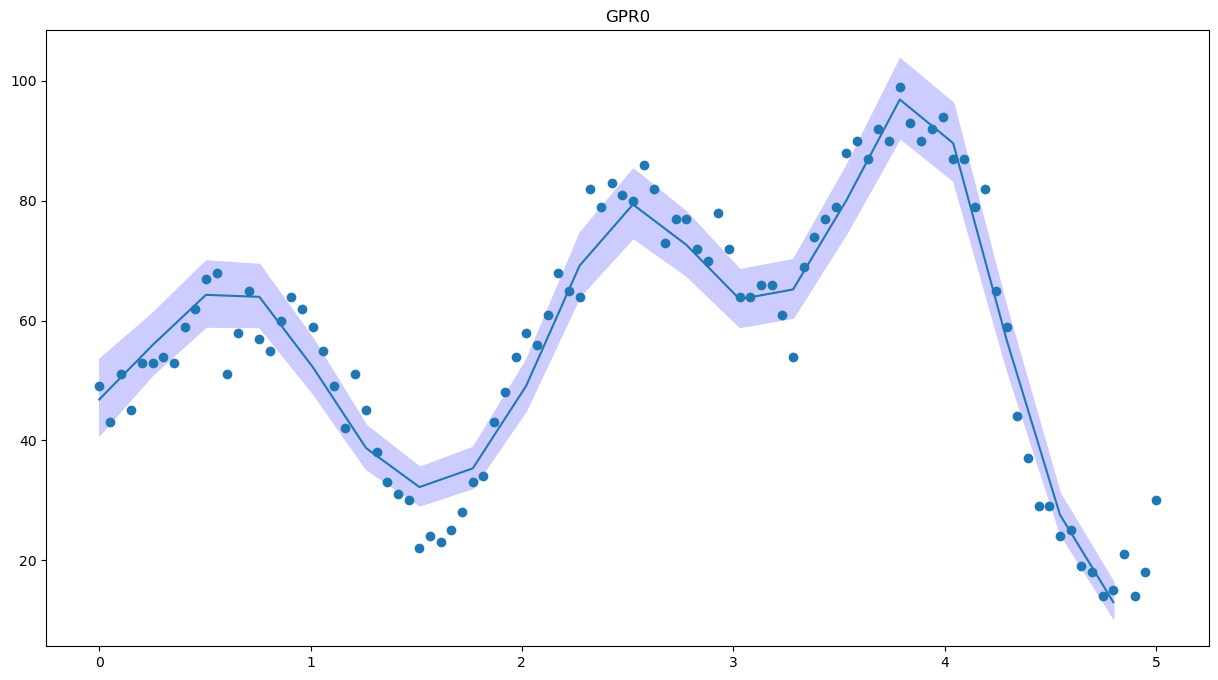

In [44]:
plt.figure(figsize=(15,8))
plt.plot(X_train0, np.exp(mu))
plt.fill_between(X_train0, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(x, data0)
plt.title(f'GPR0')
plt.show()

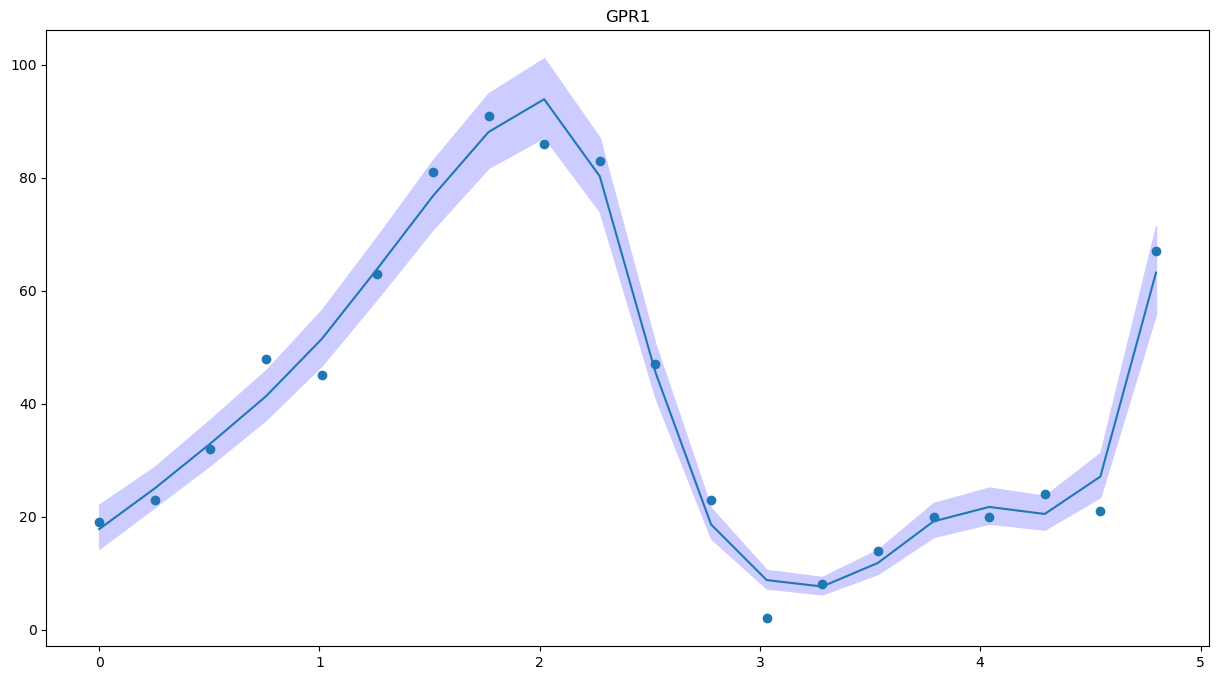

In [45]:
mu , var = gpr_poisson(X_train1 , y_train1)
mu = np.ravel(mu)    # Convert 2D array to 1D
var = np.ravel(var)  # Convert 2D array to 1D

plt.figure(figsize=(15,8))
plt.plot(X_train1, np.exp(mu))
plt.fill_between(X_train1, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(X_train1, y_train1)
plt.title(f'GPR1')
plt.show()

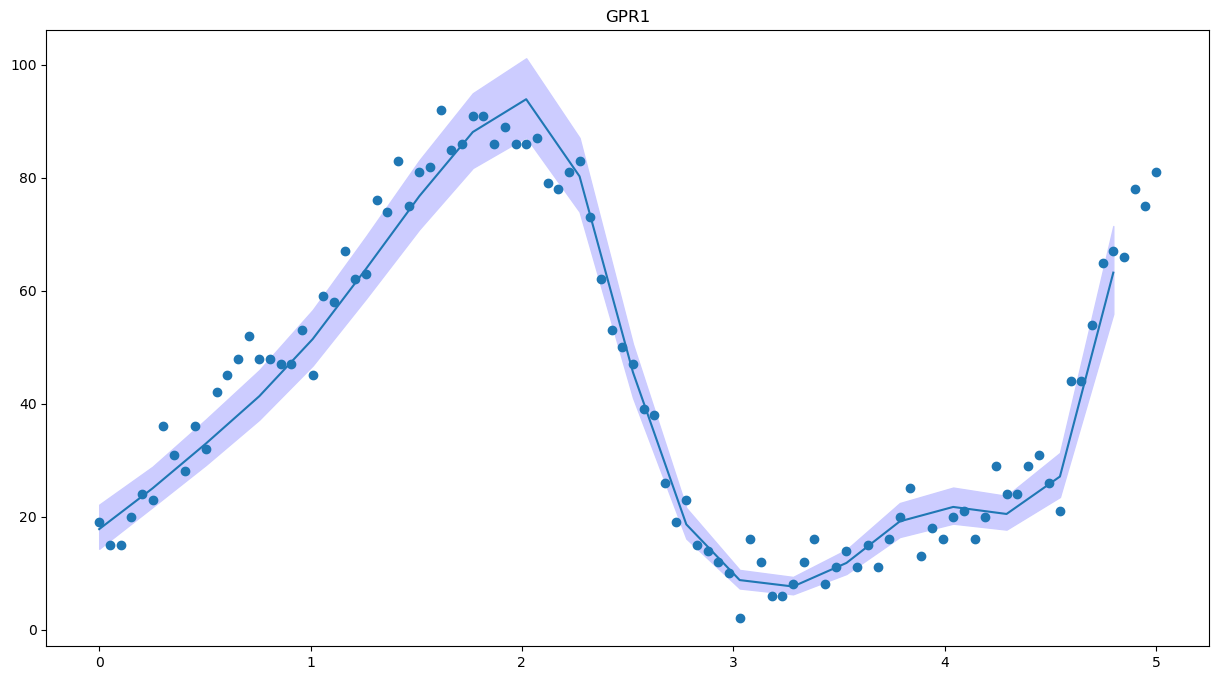

In [46]:
plt.figure(figsize=(15,8))
plt.plot(X_train1, np.exp(mu))
plt.fill_between(X_train1, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(x, data1)
plt.title(f'GPR1')
plt.show()

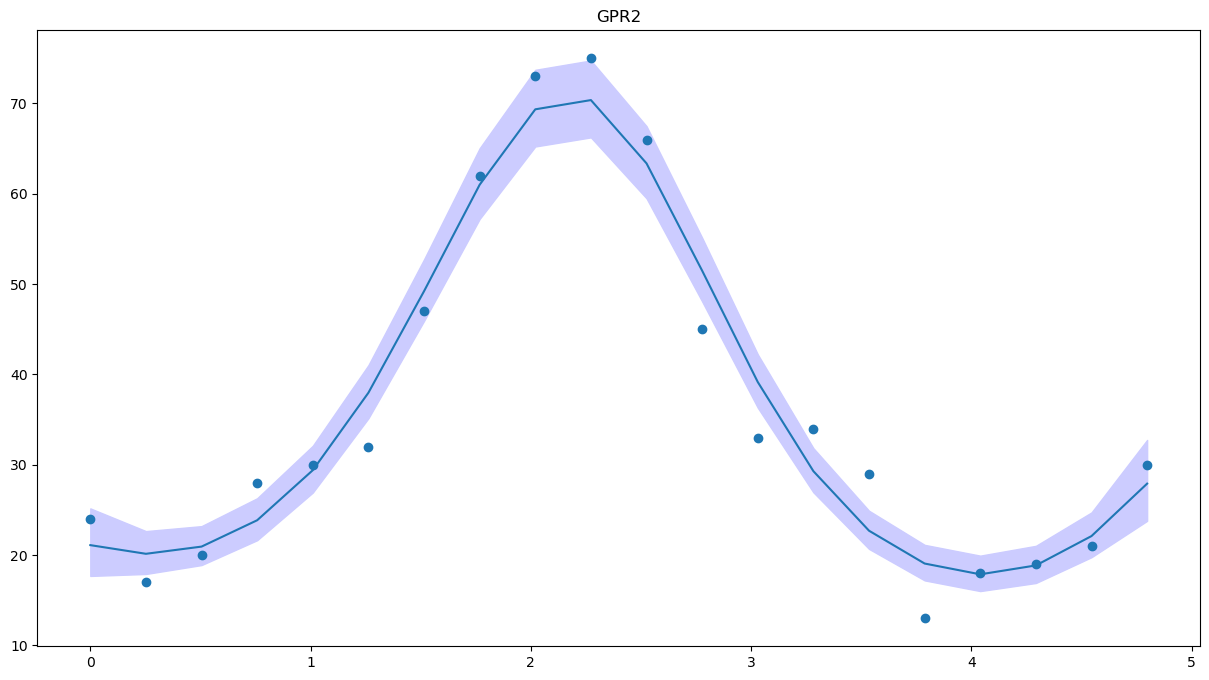

In [47]:
mu , var = gpr_poisson(X_train2 , y_train2)
mu = np.ravel(mu)    # Convert 2D array to 1D
var = np.ravel(var)  # Convert 2D array to 1D

plt.figure(figsize=(15,8))
plt.plot(X_train2, np.exp(mu))
plt.fill_between(X_train2, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(X_train2, y_train2)
plt.title(f'GPR2')
plt.show()

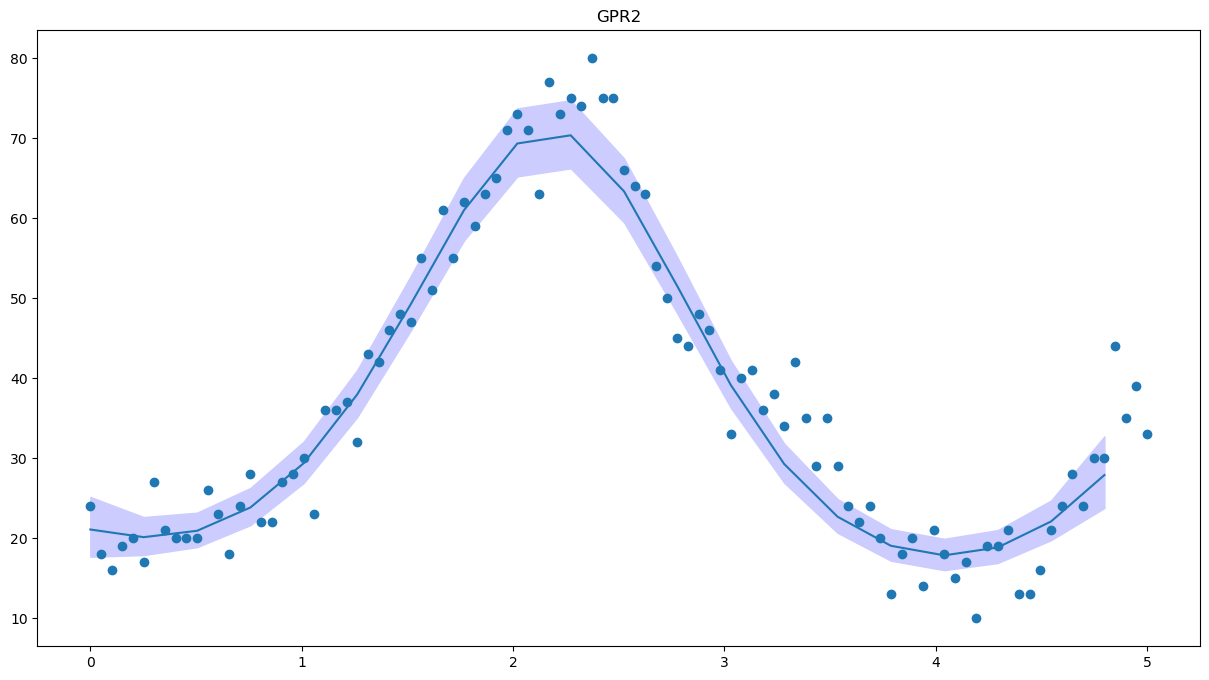

In [48]:
plt.figure(figsize=(15,8))
plt.plot(X_train2, np.exp(mu))
plt.fill_between(X_train2, np.exp(mu +  np.sqrt(var)), np.exp(mu - np.sqrt(var)) , color = '#ccccff')
plt.scatter(x, data2)
plt.title(f'GPR2')
plt.show()